<a href="https://colab.research.google.com/github/aboltCD/aboltCD/blob/main/%C3%81rboles_de_Decisi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Árboles de Decisión

En este notebook haremos predicciones sobre distintos tipos de Vino en base a sus propiedades utilizando Árboles de Decisión.

Sin embargo, el plato fuerte esta vez es el uso de validación cruzada para estabilizar los resultados al disminuir los sesgos de seleccion de datos y la optimización de hiperparámetros.

Comenzamos por importar las librerías necesarias:

In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_wine
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import pandas as pd

Ahora cargamos el dataset de los vinos, lo separamos en Features y Target, lo escalamos y dividimos en entrenamiento y prueba (en este caso, utilizamos un 10% de los datos como prueba):

In [69]:
wine = load_wine()

#separamos en features y target

df = pd.DataFrame(wine.data, columns = wine.feature_names)
df["Wine"] = wine.target
df["Wine"] = df["Wine"].astype('str')

#Feature Matrix (todos los atributos)
X = df.drop("Wine",1)  

#Target Variable
y = df[["Wine"]]      
   

#separamos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.10, random_state = 1)

#escalamos solo los features X (y es una categoría, por lo que no debe ser escalada)
scalerX = StandardScaler().fit(X_train)

X_train = scalerX.transform(X_train)
X_test = scalerX.transform(X_test)



Ahora, buscamos los mejores parámetros para el árbol utilizando Grid Search Cross Validation para buscar el mejor parámetro en una "Grilla" de posibles candidatos (combinaciones de valores de parámetros) en donde cáda candidato será evaluado con validación cruzada: 

In [70]:
param_grid = [
  {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None], 'min_samples_leaf': [0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.07, 0.1]}
 ]


tree = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid = param_grid, scoring = 'accuracy', cv=10) 

tree.fit(X_train, y_train)



GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None],

Mejor score (accuracy):  0.925
Mejores hiperparámetros:  {'max_depth': 4, 'min_samples_leaf': 0.001}
Mejor modelo:  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.001, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


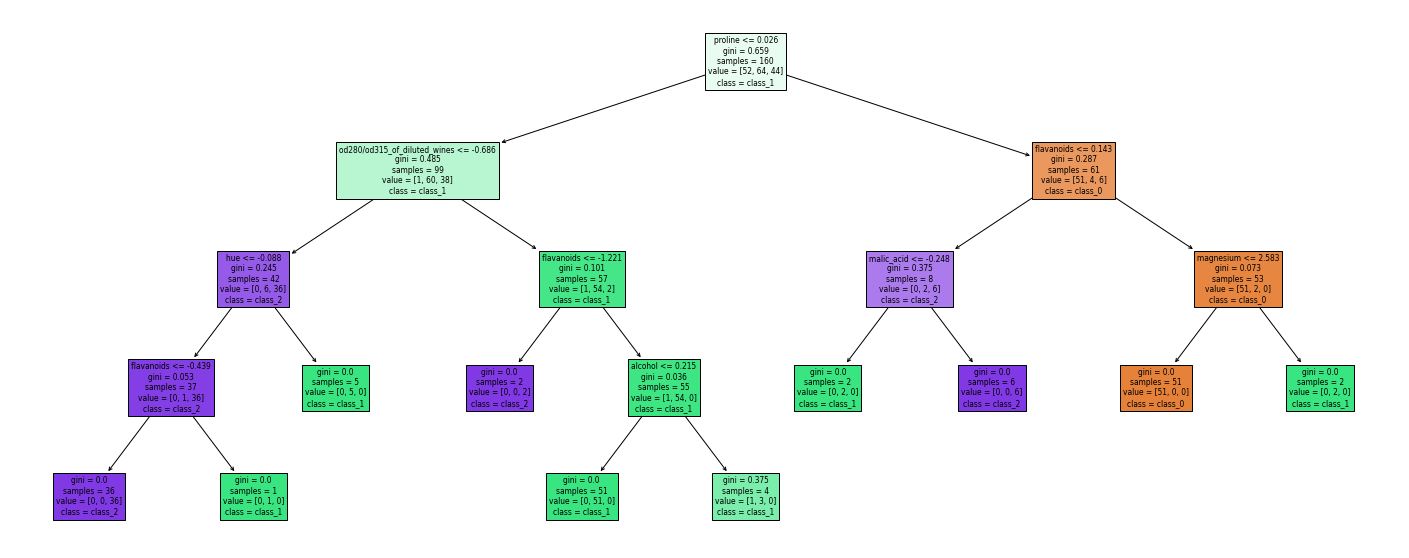

In [71]:
print("Mejor score (accuracy): ", tree.best_score_)
print("Mejores hiperparámetros: ", tree.best_params_)
print("Mejor modelo: ", tree.best_estimator_)

best_model = tree.best_estimator_

fig = plt.figure(figsize=(25,10))
plot = plot_tree(best_model, 
                   feature_names=wine.feature_names,  
                   class_names=wine.target_names,
                   filled=True)


Ahora podemos obtener el mejor "modelo". No olvidemos reentrenarlo con los datos de entrenamiento completos. Queremos utilizar sólo los hiperparámetros de este mejor modelo. Luego imprimimos sus scores finales con respecto a los datos de prueba.

In [72]:
best_model.fit(X_train,y_train)

y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred, target_names=wine.target_names))

              precision    recall  f1-score   support

     class_0       1.00      0.86      0.92         7
     class_1       0.78      1.00      0.88         7
     class_2       1.00      0.75      0.86         4

    accuracy                           0.89        18
   macro avg       0.93      0.87      0.89        18
weighted avg       0.91      0.89      0.89        18

